In [ ]:
! pip install kaggle
! pip install contractions
! pip install langdetect
! pip install transformers datasets evaluate accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 36.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Download data from fake news competition**

In [ ]:
from google.colab import files

# select your kaggle API token
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle competitions download -c 'fake-news'
!ls

 93% 43.0M/46.5M [00:00<00:00, 110MB/s]
100% 46.5M/46.5M [00:00<00:00, 113MB/s]
drive  fake-news.zip  kaggle.json  sample_data


In [ ]:
import zipfile
import pandas as pd

with zipfile.ZipFile('fake-news.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(20800, 5)
(5200, 4)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [ ]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# **Data Preprocessing**

In [ ]:
train.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
test.isna().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [ ]:
# Verify null fields
train[train.text.isna()].head(5)

,id,title,author,text,label
142,142,Gorafi Magazine : Entretien exclusif avec Bara...,NaN,NaN,1
573,573,Le top des recherches Google passe en top des ...,NaN,NaN,1
1200,1200,La Corée du Nord annonce avoir envoyé un missi...,NaN,NaN,1
1911,1911,Grand-Prix du Brésil – Romain Grosjean obtient...,NaN,NaN,1
2148,2148,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,NaN,1


## Null values treatment

In [ ]:
# Train dataset
train["author"] = train["author"].fillna("")
train["title"] = train["title"].fillna("")
train["text"] = train["text"].fillna("")
print('Train sum null values: ',train.isna().sum().sum())

# Test dataset
test["author"] = test["author"].fillna("")
test["title"] = test["title"].fillna("")
test["text"] = test["text"].fillna("")
print('Train sum null values: ', test.isna().sum().sum())

Train sum null values:  0
Train sum null values:  0


In [ ]:
# create new field input to model
train["input_text"] = train["author"] + ' ' + train["title"] + ' ' + train["text"]
test["input_text"] = test["author"] + ' ' + test["title"] + ' ' + test["text"]

In [ ]:
train.head()

,id,title,author,text,label,input_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


## Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

([<matplotlib.patches.Wedge at 0x78a846427430>,
 [Text(-1.149997783093558, -0.0022580699507423834, 'Fake'),
  Text(1.149997783093558, 0.002258069950741731, 'True')],
 [Text(-0.649998746965924, -0.0012763004069413467, '50.1%'),
  Text(0.649998746965924, 0.0012763004069409785, '49.9%')])

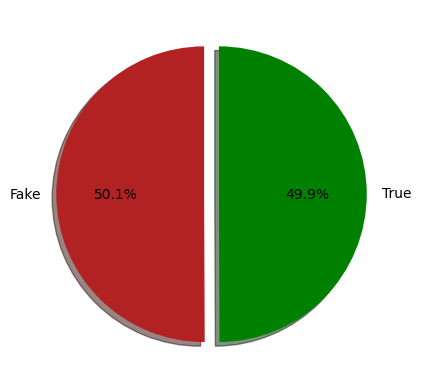

In [ ]:
# Data balanced

label_size = [train['label'].sum(),len(train['label'])-train['label'].sum()]
plt.pie(label_size,explode=[0.05,0.05],colors=['firebrick','green'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

In [ ]:
from langdetect import detect

news_lang_detected = train["input_text"].apply(detect)
news_lang_detected_test = test["input_text"].apply(detect)

In [ ]:
df_news_lang_detected = pd.DataFrame({"lang" : news_lang_detected, "label": train["label"]})
df_news_lang_detected.value_counts()

lang   label
en     0        10386
       1         9877
ru     1          156
es     1          140
de     1           95
fr     1           72
ar     1           19
tr     1            7
pt     1            7
it     1            6
no     1            6
nl     1            5
af     1            3
pl     1            3
hr     1            3
ca     1            3
el     1            2
sv     1            2
id     1            1
fr     0            1
fi     1            1
da     1            1
cy     1            1
so     1            1
sw     1            1
zh-cn  1            1
Name: count, dtype: int64

In [ ]:
news_lang_detected_test.value_counts()

input_text
en    5061
ru      47
es      32
de      23
fr      14
it       6
pt       4
id       3
ar       3
tr       3
el       2
no       1
tl       1
Name: count, dtype: int64

In [ ]:
# Token length

from typing import Dict, List

def get_token_counts(dataset: pd.DataFrame) -> Dict:
    token_counts = {"test": []}
    for _, row in dataset.iterrows():
        token_count = len(row["input_text"].split(" "))
        # print(token_count)
        if "label" in list(dataset.columns):
            # print(list(dataset.columns))
            if row["label"] not in token_counts:
                token_counts[row["label"]] = [token_count]
                # print('token counts if', token_counts)
            else:
                token_counts[row["label"]].append(token_count)
                # print('token counts else', token_counts)
        else:
            token_counts["test"].append(token_count)
    return token_counts

In [ ]:
train_num_tokens = get_token_counts(train.copy())
test_num_tokens = get_token_counts(test.copy())

In [ ]:
print(train_num_tokens.keys())
print(test_num_tokens.keys())
df_train_num_tokens = pd.concat([pd.DataFrame({"label": 0, "token_length": train_num_tokens[0]}), pd.DataFrame({"label": 1, "token_length": train_num_tokens[1]})])
df_train_num_tokens.head()

dict_keys(['test', 1, 0])
dict_keys(['test'])


,label,token_length
0,0,739
1,0,228
2,0,865
3,0,1472
4,0,1794


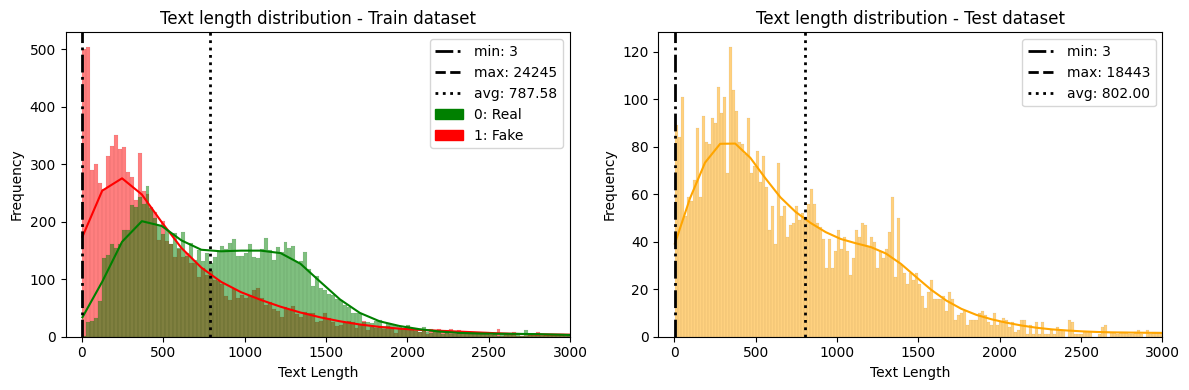

In [ ]:
import matplotlib.patches as mpatches

train_avg_length = sum(df_train_num_tokens["token_length"]) / len(df_train_num_tokens["token_length"])
train_max_length = max(df_train_num_tokens["token_length"])
train_min_length = min(df_train_num_tokens["token_length"])

test_avg_length = int(sum(test_num_tokens["test"]) / len(test_num_tokens["test"]))
test_max_length = max(test_num_tokens["test"])
test_min_length = min(test_num_tokens["test"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

colors_label = {0: "green", 1: "red"}
patch_label_0 = mpatches.Patch(color="green", label="0: Real")
patch_label_1 = mpatches.Patch(color="red", label="1: Fake")

sns.histplot(data = df_train_num_tokens, x = "token_length", kde=True, bins=1000, ax=axes[0], hue = "label", palette=colors_label)
axes[0].axvline(train_min_length, color='black', linestyle='dashdot', linewidth=2, label=f'min: {train_min_length}')
axes[0].axvline(train_max_length, color='black', linestyle='dashed', linewidth=2, label=f'max: {train_max_length}')
axes[0].axvline(train_avg_length, color='black', linestyle='dotted', linewidth=2, label=f'avg: {train_avg_length:.2f}')
axes[0].set_title("Text length distribution - Train dataset")
axes[0].set_xlabel("Text Length")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(-100, 3000)
handles, labels = axes[0].get_legend_handles_labels()
handles.extend([patch_label_0, patch_label_1])
axes[0].legend(handles=handles)

sns.histplot(test_num_tokens["test"], kde=True, color="orange", bins=1000, ax=axes[1])
axes[1].axvline(test_min_length, color='black', linestyle='dashdot', linewidth=2, label=f'min: {test_min_length}')
axes[1].axvline(test_max_length, color='black', linestyle='dashed', linewidth=2, label=f'max: {test_max_length}')
axes[1].axvline(test_avg_length, color='black', linestyle='dotted', linewidth=2, label=f'avg: {test_avg_length:.2f}')
axes[1].set_title("Text length distribution - Test dataset")
axes[1].set_xlabel("Text Length")
axes[1].set_ylabel("Frequency")
axes[1].set_xlim(-100, 3000)
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
stats_label_0 = df_train_num_tokens.query("label == 0").describe()
stats_label_1 = df_train_num_tokens.query("label == 1").describe()

pd.concat([stats_label_0, stats_label_1], axis=1)

,label,token_length,label,token_length
count,10387.0,10387.000000,10413.0,10413.000000
mean,0.0,923.974295,1.0,651.528762
std,0.0,766.173310,0.0,965.746526
min,0.0,13.000000,1.0,3.000000
25%,0.0,431.000000,1.0,185.000000
50%,0.0,816.000000,1.0,397.000000
75%,0.0,1234.000000,1.0,803.000000
max,0.0,15283.000000,1.0,24245.000000


In [ ]:
from nltk.probability import FreqDist
train_df_words = pd.DataFrame({"input_text": train["input_text"], "label": train["label"]})
tokens_label_0 = [token for i, lista_tokens in enumerate(train_df_words['input_text'])
                  if train_df_words['label'].iloc[i] == 0 for token in list(lista_tokens.split(" "))]
tokens_label_1 = [token for i, lista_tokens in enumerate(train_df_words['input_text'])
                  if train_df_words['label'].iloc[i] == 1 for token in list(lista_tokens.split(" "))]

In [ ]:
fdist_label_0 = FreqDist(tokens_label_0)
fdist_label_1 = FreqDist(tokens_label_1)

In [ ]:
print("Most frequent words real news:")
fdist_label_0.most_common(10)

Most frequent words real news:


[('the', 477786),
 ('', 297406),
 ('to', 245507),
 ('of', 238936),
 ('a', 221848),
 ('and', 206978),
 ('in', 173291),
 ('that', 114656),
 ('for', 82760),
 ('on', 77853)]

In [ ]:
print("Most frequent words fake news:")
fdist_label_1.most_common(10)

Most frequent words fake news:


[('the', 338838),
 ('of', 178441),
 ('to', 177388),
 ('and', 157253),
 ('a', 123307),
 ('in', 108568),
 ('that', 81339),
 ('is', 78508),
 ('for', 54773),
 ('on', 45013)]

## Cleaning data

In [ ]:
# Split train dataset (train, val, test)

original_train = train.copy()
train = train[["input_text", "label"]]

train_size = int(0.9 * len(train))
train_df = train[:train_size]
test_df = train[train_size:]

In [ ]:
from sklearn.model_selection import train_test_split
train_data, val_data, train_label, val_label = train_test_split(train_df['input_text'], train_df['label'],
                                                                    random_state=1108,
                                                                    test_size=0.3,
                                                                    shuffle=False)
val_label = val_label.reset_index()["label"]
test_data, test_label = test_df['input_text'], test_df['label']
test_data_submission = test['input_text']

print('Train dataset: ', train_data.shape)
print('Validation dataset: ', val_data.shape)
print('Test dataset: ', test_data.shape)
print('Test dataset submission Kaggle: ', test_data_submission.shape)

Train dataset:  (13104,)
Validation dataset:  (5616,)
Test dataset:  (2080,)
Test dataset submission Kaggle:  (5200,)


In [ ]:
import nltk
import re

import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def lowercasing_text(input_text):
    input_text = input_text.apply(lambda x: x.lower())
    return input_text

def words_contractions_processing(input_text):
    try:
        input_text = input_text.apply(lambda x: ' '.join([contractions.fix(word) for word in x.split()]))
    except:
        None
    return input_text

def remove_numeric_values(input_text):
    input_text = input_text.apply(lambda x: re.sub(r'\d+', ' ', x))
    return input_text

def remove_punctuation(input_text):
    input_text = input_text.apply(lambda x: re.sub(r'[^\w\s]', '', x))
    return input_text

def remove_line_break(input_text):
    input_text = input_text.apply(lambda x: x.replace("\n", " "))
    return input_text

def english_vocabulary(input_text):
    input_text = input_text.apply(lambda x: re.sub(r'[^a-z]+', ' ', x))
    return input_text

def remove_spaces_between_words(input_text):
    input_text = input_text.apply(lambda x: re.sub(r'\s+', ' ', x))
    return input_text

# Lemmatization functions
def nltkToWordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Lemmatize a list of words/tokens
def lemmatize(tokens):
    pos_tags = nltk.pos_tag(tokens)
    res_words = []
    for word, tag in pos_tags:
        tag = nltkToWordnet(tag)
        if tag is None:
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word, tag))
    return res_words

def lemmatization_stopwords_removal(input_text):
    input_text = input_text.apply(word_tokenize)
    stop_words = set(stopwords.words('english'))
    input_text = input_text.apply(lambda x: lemmatize(x))
    input_text =  input_text.apply(lambda x: [word for word in x if word not in stop_words])
    input_text = input_text.apply(" ".join)
    return input_text

In [ ]:
def preprocessing_news(data):
    data = lowercasing_text(data)
    data = words_contractions_processing(data)
    data = remove_numeric_values(data)
    data = remove_punctuation(data)
    data = remove_line_break(data)
    data = english_vocabulary(data)
    data = remove_spaces_between_words(data)
    data = lemmatization_stopwords_removal(data)
    return data

In [ ]:
import datetime

ini = datetime.datetime.now()
train_data = preprocessing_news(train_data)
val_data = preprocessing_news(val_data)
test_data = preprocessing_news(test_data)
test_data_submission = preprocessing_news(test_data_submission)
end = datetime.datetime.now()

print('Duration cleaning data: ' , end-ini)

Duration cleaning data:  0:14:36.519638


In [ ]:
df_train_clean = pd.DataFrame({"input_text": train_data, "label": train_label})
train_clean_num_tokens = get_token_counts(df_train_clean)

train_clean_avg_length = (sum(train_clean_num_tokens[1]) + sum(train_clean_num_tokens[0]))/(len(train_clean_num_tokens[1]) + len(train_clean_num_tokens[0]))
train_clean_max_length = max(max(train_clean_num_tokens[1]),max(train_clean_num_tokens[1]))
train_clean_min_length = min(min(train_clean_num_tokens[1]),min(train_clean_num_tokens[1]))

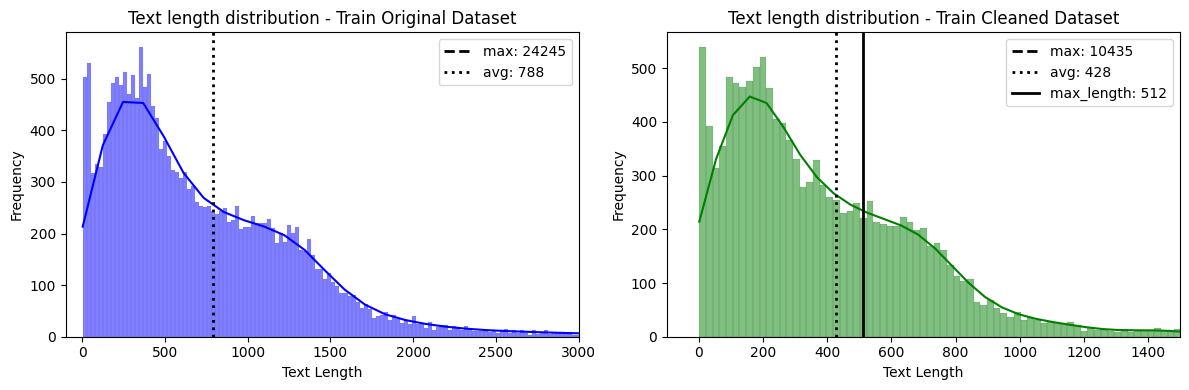

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.histplot(data = df_train_num_tokens, x = "token_length", kde=True, color="blue", bins=1000, ax=axes[0])
# axes[0].axvline(train_min_length, color='black', linestyle='dashdot', linewidth=2, label=f'min: {train_min_length}')
axes[0].axvline(train_max_length, color='black', linestyle='dashed', linewidth=2, label=f'max: {train_max_length}')
axes[0].axvline(train_avg_length, color='black', linestyle='dotted', linewidth=2, label=f'avg: {train_avg_length:.0f}')
axes[0].set_title("Text length distribution - Train Original Dataset")
axes[0].set_xlabel("Text Length")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(-100, 3000)
axes[0].legend()

sns.histplot(train_clean_num_tokens[0]+train_clean_num_tokens[1], kde=True, color="green", bins=500, ax=axes[1])
# axes[1].axvline(train_clean_min_length, color='black', linestyle='dashdot', linewidth=2, label=f'min: {train_clean_min_length}')
axes[1].axvline(train_clean_max_length, color='black', linestyle='dashed', linewidth=2, label=f'max: {train_clean_max_length}')
axes[1].axvline(train_clean_avg_length, color='black', linestyle='dotted', linewidth=2, label=f'avg: {train_clean_avg_length:.0f}')
axes[1].axvline(512, color='black', linewidth=2, label=f'max_length: {512:.0f}')
axes[1].set_title("Text length distribution - Train Cleaned Dataset")
axes[1].set_xlabel("Text Length")
axes[1].set_ylabel("Frequency")
axes[1].set_xlim(-100, 1500)
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
df_train_clean_num_tokens = pd.concat([pd.DataFrame({"label": 0, "token_length": train_clean_num_tokens[0]}), pd.DataFrame({"label": 1, "token_length": train_clean_num_tokens[1]})])

stats_train_original = df_train_num_tokens.describe()
stats_train_clean = df_train_clean_num_tokens.describe()

df_concat_stats = pd.concat([stats_train_original, stats_train_clean], axis=1)
df_concat_stats.columns = [["label1","token_length_train_original","label2", "token_length_train_cleaned"]]

In [ ]:
df_concat_stats[["token_length_train_original", "token_length_train_cleaned"]]

,token_length_train_original,token_length_train_cleaned
count,20800.000000,13104.000000
mean,787.581250,427.825092
std,882.372346,467.283184
min,3.000000,1.000000
25%,286.000000,157.000000
50%,580.000000,318.500000
75%,1086.000000,588.250000
max,24245.000000,10435.000000


In [ ]:
train_data_words = pd.DataFrame({"input_text": train_data, "label": train_label})

In [ ]:
train_tokens_label_0 = [token for i, lista_tokens in enumerate(train_data_words['input_text'])
                  if train_data_words['label'].iloc[i] == 0 for token in list(lista_tokens.split(" "))]
train_tokens_label_1 = [token for i, lista_tokens in enumerate(train_data_words['input_text'])
                  if train_data_words['label'].iloc[i] == 1 for token in list(lista_tokens.split(" "))]

In [ ]:
fdist_label_0 = FreqDist(train_tokens_label_0)
fdist_label_1 = FreqDist(train_tokens_label_1)

In [ ]:
print("Most frequent words real news:")
fdist_label_0.most_common(10)

Most frequent words real news:


[('say', 52278),
 ('mr', 41817),
 ('trump', 23268),
 ('new', 16737),
 ('would', 15957),
 ('state', 15655),
 ('time', 15336),
 ('one', 14945),
 ('year', 13784),
 ('people', 12886)]

In [ ]:
print("Most frequent words fake news:")
fdist_label_1.most_common(10)

Most frequent words fake news:


[('clinton', 13154),
 ('say', 13151),
 ('trump', 12764),
 ('people', 10889),
 ('would', 10616),
 ('one', 10536),
 ('state', 10465),
 ('us', 9879),
 ('hillary', 8391),
 ('go', 8298)]

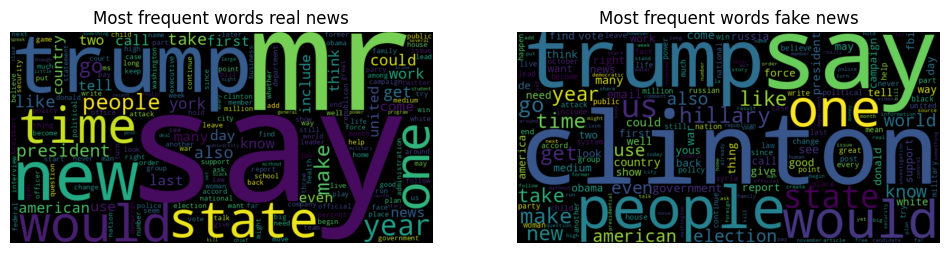

In [ ]:
from wordcloud import WordCloud

wordcloud_label_0 = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(fdist_label_0)
wordcloud_label_1 = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(fdist_label_1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_label_0, interpolation='bilinear')
plt.title('Most frequent words real news')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_label_1, interpolation='bilinear')
plt.title('Most frequent words fake news')
plt.axis('off')

plt.show()

In [ ]:
import numpy as np

data_array = np.array(train_clean_num_tokens[0] + train_clean_num_tokens[1])
limit_tokens = np.sum(data_array <= 512)
print(f"{(limit_tokens / len(data_array))*100:.0f}% of the news have less than or equal to 512 tokens")

69% of the news have less than or equal to 512 tokens


# **BERT Model Train in Native Pytorch**

In [ ]:
max_length = 512
transformer_model = "bert-base-uncased"

## Preparing input data

In [ ]:
train_data_tot = pd.DataFrame({'input_text': train_data, 'labels': train_label})
val_data_tot = pd.DataFrame({'input_text': val_data.reset_index()["input_text"], 'labels': val_label})

from datasets import Dataset, DatasetDict

train_dataset =  Dataset.from_pandas(train_data_tot)
val_dataset   =  Dataset.from_pandas(val_data_tot)
test_dataset  =  Dataset.from_pandas(pd.DataFrame({'input_text':test_data}))

In [ ]:
print(train_dataset)
print(val_dataset)
print(test_dataset)

Dataset({
    features: ['input_text', 'labels'],
    num_rows: 13104
})
Dataset({
    features: ['input_text', 'labels'],
    num_rows: 5616
})
Dataset({
    features: ['input_text'],
    num_rows: 2080
})


## Tokenization

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(transformer_model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["input_text"], max_length = max_length, truncation=True, padding="max_length")

In [ ]:
tokenized_train = train_dataset.map(preprocess_function,batched=True)
tokenized_val   = val_dataset.map(preprocess_function,batched=True)
tokenized_test  = test_dataset.map(preprocess_function,batched=True)

tokenized_train.set_format("torch")
tokenized_val.set_format("torch")
tokenized_test.set_format("torch")

Map:   0%|          | 0/13104 [00:00<?, ? examples/s]

Map:   0%|          | 0/5616 [00:00<?, ? examples/s]

Map:   0%|          | 0/2080 [00:00<?, ? examples/s]

In [ ]:
print(tokenized_train)
print(tokenized_val)
print(tokenized_test)

Dataset({
    features: ['input_text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 13104
})
Dataset({
    features: ['input_text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5616
})
Dataset({
    features: ['input_text', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2080
})


In [ ]:
tokenized_train[0]["input_ids"]

tensor([  101, 23158, 12776,  2271,  2160, 17183, 14895,  2130,  2156,  2272,
         7274,  3661,  4463, 15775, 16020,  5753,  1056, 28394,  2102,  2160,
        17183, 14895,  2130,  2156,  2272,  7274,  3661,  4463, 15775, 16020,
         5753,  1056, 28394,  2102, 23158, 12776,  2271,  2255,  4942, 29234,
         4463, 15775, 16020,  5753, 22475,  2137,  9292,  6646,  3746, 14571,
         2745,  8183, 25105,  2800,  5541,  7674,  3762,  6105, 12480,  6766,
        19330, 23991,  2078,  4797,  2919,  2711,  2088,  2733, 26337,  2072,
         2472,  2508,  2272,  2100, 15802,  2160,  3537, 14895,  2298,  2066,
         2036,  2113,  2117, 12155, 12096,  2711,  2092,  2735,  2272,  2100,
         4604,  2085,  2378,  7011, 27711,  3661, 14970,  8495,  2298, 10373,
         2089, 14396, 18520,  7207, 10373,  8241,  5464,  7672,  7882,  2837,
         2963,  2272,  2100,  2424,  3081,  1056, 28394,  2102,  2028,  3951,
         2837,  3472,  2113,  2272,  2100,  2025,  8757,  3951, 

In [ ]:
tokenized_train = tokenized_train.remove_columns(["input_text"])
tokenized_val   = tokenized_val.remove_columns(["input_text"])
tokenized_test  = tokenized_test.remove_columns(["input_text"])

In [ ]:
# tokenized_train[0]

## Training

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from torch.utils.data import DataLoader

# Dataloader
train_dataloader  = DataLoader( dataset = tokenized_train, shuffle = True, batch_size = 16)
eval_dataloader   = DataLoader(dataset = tokenized_val,shuffle = False, batch_size = 16)
test_dataloader   = DataLoader( dataset = tokenized_test, shuffle = False, batch_size = 16)

In [ ]:
train_dataloader

In [ ]:
for batch in train_dataloader:
  break
{k: v.shape for k,v in batch.items()}

{'labels': torch.Size([16]),
 'input_ids': torch.Size([16, 512]),
 'token_type_ids': torch.Size([16, 512]),
 'attention_mask': torch.Size([16, 512])}

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(transformer_model, num_labels = 2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
num_training_steps

2457

In [ ]:
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr = 5e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_scheduler

lr_scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# del model

In [ ]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

  0%|          | 0/2457 [00:00<?, ?it/s]

## Evaluation

In [ ]:
# evaluate.list_evaluation_modules()

In [ ]:
import evaluate

m_accuracy = evaluate.load("accuracy")
m_f1 = evaluate.load("f1")
m_recall = evaluate.load("recall")

In [ ]:
model.eval()
logits_all = []
predicted_prob_all = []
predictions_all = []

In [ ]:
for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    logits_all.append(logits)
    predicted_prob = torch.softmax(logits, dim=1)
    predicted_prob_all.append(predicted_prob)
    predictions = torch.argmax(logits, dim=-1)
    predictions_all.append(predictions)
    m_accuracy.add_batch(predictions=predictions, references=batch["labels"])
    m_f1.add_batch(predictions=predictions, references=batch["labels"])
    m_recall.add_batch(predictions=predictions, references=batch["labels"])

print(m_accuracy.compute())
print(m_f1.compute())
print(m_recall.compute())

{'accuracy': 0.99002849002849}
{'f1': 0.9898953446409239}
{'recall': 0.98491921005386}


## Prediction

### Test Dataset

In [ ]:
def predict_text(text):

    inputs = {k: v.to(device) for k, v in text.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predicted_prob = torch.softmax(logits, dim=1)

    predictions = torch.argmax(logits, dim=-1)

    return predictions, predicted_prob

In [ ]:
all_predictions = []
all_predicted_prob = []
for batch in test_dataloader:
    predictions, predicted_prob = predict_text(batch)
    all_predictions.append(predictions)
    all_predicted_prob.append(predicted_prob)

In [ ]:
predictions = torch.cat(all_predictions)
predicted_prob = torch.cat(all_predicted_prob)

In [ ]:
predictions

tensor([1, 0, 1,  ..., 0, 1, 1], device='cuda:0')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

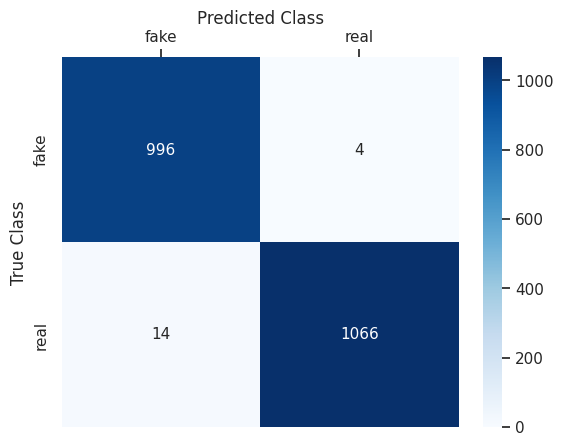

              precision    recall  f1-score   support

        fake     0.9861    0.9960    0.9910      1000
        real     0.9963    0.9870    0.9916      1080

    accuracy                         0.9913      2080
   macro avg     0.9912    0.9915    0.9913      2080
weighted avg     0.9914    0.9913    0.9913      2080



In [ ]:
confusion = confusion_matrix(np.array(test_label), predictions.cpu().numpy()) # Convert tensor to cpu

# plot confusion matrix
sns.set(font_scale=1.0)
labels = ["fake", "real"]
ax = sns.heatmap(confusion, annot=True, annot_kws={"size": 11}, fmt='d', vmin = 0, cmap='Blues', yticklabels=labels, xticklabels=labels)
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.show()

# print classification report
report = classification_report(np.array(test_label), predictions.cpu().numpy(), digits = 4, output_dict=False, target_names=["fake", "real"],)
print(report)

### Test Dataset Kaggle (Submission)

In [ ]:
test_dataset_sub =  Dataset.from_pandas(pd.DataFrame({'input_text':test_data_submission}))
tokenized_test_sub = test_dataset_sub.map(preprocess_function,batched=True)
tokenized_test_sub = tokenized_test_sub.remove_columns(["input_text"])

print(tokenized_test_sub)

tokenized_test_sub.set_format("torch")
test_sub_dataloader = DataLoader( dataset = tokenized_test_sub, shuffle = False, batch_size = 16)

Map:   0%|          | 0/5200 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5200
})


In [ ]:
all_predictions = []
all_predicted_prob = []
for batch in test_sub_dataloader:
    predictions, predicted_prob = predict_text(batch)
    all_predictions.append(predictions)
    all_predicted_prob.append(predicted_prob)

In [ ]:
predictions_sub = torch.cat(all_predictions)
predicted_prob_sub = torch.cat(all_predicted_prob)

In [ ]:
predicted_prob_sub

tensor([[9.9942e-01, 5.8331e-04],
        [3.8462e-04, 9.9962e-01],
        [3.9475e-04, 9.9961e-01],
        ...,
        [9.9941e-01, 5.8600e-04],
        [3.6671e-04, 9.9963e-01],
        [9.9918e-01, 8.2277e-04]], device='cuda:0')

In [ ]:
print(predictions_sub.cpu().numpy().tolist())

[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 

In [ ]:
kaggle_results = pd.DataFrame({"id":test["id"], "label": predictions_sub.cpu().numpy().tolist()})
kaggle_results.to_csv("/content/drive/MyDrive/Colab Notebooks/TFM/bert-uncased.csv", index=False)

In [ ]:
kaggle_results

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1
...,...,...
5195,25995,0
5196,25996,0
5197,25997,0
5198,25998,1


## Save Model

In [ ]:
torch.save(model, "/content/drive/MyDrive/Colab Notebooks/TFM/bert_model")

In [ ]:
model_loaded = torch.load("/content/drive/MyDrive/Colab Notebooks/TFM/bert_model")

In [ ]:
model_loaded.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
text_news = """
Trump taps federal appeals court Judge Brett Kavanaugh for Supreme Court
WASHINGTON — President Donald Trump on Monday nominated Brett Kavanaugh, a federal appeals court judge in Washington, to succeed Justice Anthony Kennedy on the Supreme Court.
Trump made the announcement shortly after 9 p.m. ET at the White House, where he was joined by Kavanaugh and his family. NBC News broke the story shortly before the president made his choice public.
"What matters is not a judge's personal views, but whether they can set aside those views to do what the law and the Constitution require," Trump said in the prime-time announcement from the East Room. "I am pleased to say I have found, without doubt, such a person."
"It is my my honor to announce that I will nominate that I will nominate Justice Brett Kavanaugh to the United States Supreme Court," Trump added.
Kavanaugh then emerged, along with his wife, Ashley, and two young daughters.
Trump praised his nominee as a judge with "impeccable credentials" and said he is "considered a judge’s judge."
"""
text_news_prep = preprocessing_news(pd.Series(text_news))

from transformers import AutoTokenizer
tokenizer_model = AutoTokenizer.from_pretrained("bert-base-uncased")
tokenized_news = tokenizer_model(text_news_prep.tolist(), truncation=True, padding=True, max_length=512, return_tensors="pt")

In [ ]:
tokenized_news = {key: value.to(device) for key, value in tokenized_news.items()}

In [ ]:
tokenized_news

{'input_ids': tensor([[  101,  8398, 11112,  2976,  5574,  2457,  3648, 12049, 10556, 27313,
           8953,  4259,  2457,  2899,  2343,  6221,  8398,  6928, 23388, 12049,
          10556, 27313,  8953,  2976,  5574,  2457,  3648,  2899,  9510,  3425,
           4938,  5817,  4259,  2457,  8398,  2191,  8874,  3859,  7610,  3802,
           2317,  2160,  3693, 10556, 27313,  8953,  2155,  6788,  2739,  3338,
           2466,  3859,  2343,  2191,  3601,  2270,  3043,  3648,  3167,  3193,
           3251,  2275,  4998,  3193,  2375,  4552,  5478,  8398,  2360, 18474,
           8874,  2264,  2282,  7537,  2360,  2424,  2302,  4797,  2711,  3932,
          14970, 23388, 23388,  3425, 12049, 10556, 27313,  8953,  2142,  2110,
           4259,  2457,  8398,  5587, 10556, 27313,  8953, 12636,  2247,  2564,
           9321,  2048,  2402,  2684,  8398,  8489,  9773,  3648, 17727,  8586,
          21170, 13675, 14728, 19909,  2360,  5136,  3648,  3648,   102]],
        device='cuda:0'),
 'toke

In [ ]:
predictions = model_loaded(**tokenized_news)
predictions

SequenceClassifierOutput(loss=None, logits=tensor([[ 2.8380, -2.8586]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
import torch.nn.functional as F

probabilities = F.softmax(predictions.logits, dim=1)
predicted_class = torch.argmax(probabilities, dim=1)

predicted_class

tensor([0], device='cuda:0')

In [ ]:
if predicted_class.cpu().numpy() == [1]:
  # print(text_news)
  print("Is a Fake News")
else:
  # print(text_news)
  print("Is a Real News")

Is a Real News
